# **Data Preparation**

In [ ]:
import numpy as np
binance_arr = np.load('/content/binance_order_array.npy', allow_pickle=True)
bitfinex_arr = np.load('/content/bitfinex_order_array.npy', allow_pickle=True)
coinbase_arr = np.load('/content/coinbase_order_array.npy', allow_pickle=True)

# **Getting max bids and min asks for exchanges**

**Binance**

In [ ]:
binance_max_bids = []
binance_max_bids_quantity = []

binance_min_asks = []
binance_min_asks_quantity = []

order_time = []


for i in range(binance_arr.shape[0]):

  binance_bids_list = []
  binance_bids_quantity = []

  binance_asks_list = []
  binance_asks_quantity = []

  

  for j in range(100):

    binance_bids_list.append(binance_arr[i]['bids'][j][0])
    binance_bids_quantity.append(binance_arr[i]['bids'][j][1])

    binance_asks_list.append(binance_arr[i]['asks'][j][0])
    binance_asks_quantity.append(binance_arr[i]['asks'][j][1])


  order_time.append(binance_arr[i]['time'])

  a = max(binance_bids_list)
  index = binance_bids_list.index(a)
  binance_max_bids.append(a)
  binance_max_bids_quantity.append(binance_bids_quantity[index])

  b = min(binance_asks_list)
  index2 = binance_asks_list.index(b)
  binance_min_asks.append(b)
  binance_min_asks_quantity.append(binance_asks_quantity[index2])


**Bitfinex**

In [ ]:
bitfinex_max_bids = []
bitfinex_max_bids_quantity = []

bitfinex_min_asks = []
bitfinex_min_asks_quantity = []

order_time_bitf = []

for i in range(bitfinex_arr.shape[0]):

  bitfinex_bids_list = []
  bitfinex_bids_quantity = []

  bitfinex_asks_list = []
  bitfinex_asks_quantity = []


  for j in range(25):

    bitfinex_bids_list.append(bitfinex_arr[i]['orders'][j][0])
    bitfinex_bids_quantity.append(bitfinex_arr[i]['orders'][j][2])

    bitfinex_asks_list.append(bitfinex_arr[i]['orders'][j+25][0])
    bitfinex_asks_quantity.append(bitfinex_arr[i]['orders'][j+25][2])


  order_time_bitf.append(bitfinex_arr[i]['time'])

  a = max(bitfinex_bids_list)
  index = bitfinex_bids_list.index(a)
  bitfinex_max_bids.append(a)
  bitfinex_max_bids_quantity.append(bitfinex_bids_quantity[index])



  b = min(bitfinex_asks_list)
  index2 = bitfinex_asks_list.index(b)
  bitfinex_min_asks.append(b)
  bitfinex_min_asks_quantity.append(bitfinex_asks_quantity[index2]*(-1))


**Coinbase**

In [ ]:
coinbase_max_bids = []
coinbase_max_bids_quantity = []

coinbase_min_asks = []
coinbase_min_asks_quantity = []

order_time_cb = []

for i in range(coinbase_arr.shape[0]):
  
  coinbase_max_bids.append(coinbase_arr[i]['bids'][0][0])
  coinbase_max_bids_quantity.append(coinbase_arr[i]['bids'][0][1])

  coinbase_min_asks.append(coinbase_arr[i]['asks'][0][0])
  coinbase_min_asks_quantity.append(coinbase_arr[i]['asks'][0][1])

  order_time_cb.append(coinbase_arr[i]['time'])

# **Merging all data according to timestamp**

# **Preparing Order book data to merge**

**Bitfinex**

In [ ]:
order_time = np.array(order_time)

In [ ]:
bitf_book_time = []
bitf_book_ind = []

for i in range(order_time.shape[0]):
  for j in range(np.array(order_time_bitf).shape[0]):
    if str(order_time[i])[:-3] == str(order_time_bitf[j])[:-3]:
      bitf_book_time.append(j)

  bitf_book_ind.append(bitf_book_time) 
  bitf_book_time = []

In [ ]:
all_bid_bitf = []
all_ask_bitf = []

for i in range (np.array(order_time_bitf).shape[0]):
  all_bid_bitf.append(bitfinex_max_bids[i])
  all_ask_bitf.append(bitfinex_min_asks[i])

bitf_bid_ave = average(all_bid_bitf)
bitf_ask_ave = average(all_ask_bitf)

In [ ]:
for i in range (np.array(bitf_book_ind).shape[0]):
  for j in range (np.array(bitf_book_ind).shape[0]):
      if not bitf_book_ind[i]:
        if i-j >= 0:
          if bitf_book_ind[i-j]:
            bitf_book_ind[i] = bitf_book_ind[i-j]
          else:
            bitf_book_ind[i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
bitfinex_max_bids = np.array(bitfinex_max_bids)
bitfinex_min_asks = np.array(bitfinex_min_asks)

In [ ]:
bitfinex_bid_prices = []
bitfinex_ask_prices = []

for i in range (np.array(bitf_book_ind).shape[0]):

  if bitf_book_ind[i] == 0:
    bitfinex_bid_prices.append(bitf_bid_ave)
    bitfinex_ask_prices.append(bitf_ask_ave)
  else:
    bitfinex_bid_prices.extend(bitfinex_max_bids[bitf_book_ind[i]])
    bitfinex_ask_prices.extend(bitfinex_min_asks[bitf_book_ind[i]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


**Coinbase**

In [ ]:
cb_book_time = []
cb_book_ind = []

for i in range(order_time.shape[0]):
  for j in range(np.array(order_time_cb).shape[0]):
    if str(order_time[i])[:-3] == str(order_time_cb[j])[:-3]:
      cb_book_time.append(j)

  cb_book_ind.append(cb_book_time) 
  cb_book_time = []

In [ ]:
all_bid_cb = []
all_ask_cb = []

for i in range (np.array(order_time_cb).shape[0]):
  all_bid_cb.append(coinbase_max_bids[i])
  all_ask_cb.append(coinbase_min_asks[i])

cb_bid_ave = average(all_bid_cb)
cb_ask_ave = average(all_ask_cb)

In [ ]:
for i in range (np.array(cb_book_ind).shape[0]):
  for j in range (np.array(cb_book_ind).shape[0]):
      if not cb_book_ind[i]:
        if i-j >= 0:
          if cb_book_ind[i-j]:
            cb_book_ind[i] = cb_book_ind[i-j]
          else:
            cb_book_ind[i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
coinbase_max_bids = np.array(coinbase_max_bids)
coinbase_min_asks = np.array(coinbase_min_asks)

In [ ]:
coinbase_bid_prices = []
coinbase_ask_prices = []

for i in range (np.array(cb_book_ind).shape[0]):

  if cb_book_ind[i] == 0:
    coinbase_bid_prices.append(cb_bid_ave)
    coinbase_ask_prices.append(cb_ask_ave)
  else:
    coinbase_bid_prices.extend(coinbase_max_bids[cb_book_ind[i]].astype(float))
    coinbase_ask_prices.extend(coinbase_min_asks[cb_book_ind[i]].astype(float))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


# **Preparing Trade data to merge**

In [ ]:
binance_tr_arr = np.load('/content/binance_trade_array.npy', allow_pickle=True)
bitfinex_tr_arr = np.load('/content/bitfinex_trade_array.npy', allow_pickle=True)
coinbase_tr_arr = np.load('/content/coinbase_trade_array.npy', allow_pickle=True)

**Binance**

In [ ]:
order_time = np.array(order_time)
binance_tr = np.array(bitfinex_tr_arr)

In [ ]:
times = []
time_ind_bin = []
for i in range(1, order_time.shape[0]):
  for j in range(binance_tr_arr.shape[0]):
    if str(order_time[i-1])[:-3]==str(binance_tr_arr[j]['T'])[:-3]:
      times.append(j)

  time_ind_bin.append(times) 
  times = []

KeyboardInterrupt: ignored

In [ ]:
bin_tr_array = np.array(time_ind_bin)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range (bin_tr_array.shape[0]):
  if len(time_ind_bin[i]) != 0:
    time_ind_bin[i] = time_ind_bin[i][len(time_ind_bin[i])-1]

In [ ]:
def average(lst): 
  c=0
  sumx = 0
  for i in range(len(lst)):
    if lst[i]:
      sumx += float(lst[i])
      c+=1
    
  return sumx / c

In [ ]:
all_bin = []
for i in range (binance_tr_arr.shape[0]):
  all_bin.append(binance_tr_arr[i]['p'])

bin_ave = average(all_bin)

In [ ]:
for i in range (bin_tr_array.shape[0]):
  for j in range (bin_tr_array.shape[0]):
    if not time_ind_bin[i]:
      if i-j >= 0:
        if time_ind_bin[i-j]:
          time_ind_bin[i] = time_ind_bin[i-j]
        else:
          time_ind_bin[i] = 0

In [ ]:
binance_tr_prices = []
for i in range (bin_tr_array.shape[0]):
  if time_ind_bin[i] == 0:
    binance_tr_prices.append(bin_ave)
  else:
    binance_tr_prices.append(binance_tr_arr[time_ind_bin[i]]['p'])

In [ ]:
np.array(binance_tr_prices).shape

(10052,)

**Bitfinex**

In [ ]:
bitfinex_tr_arr = np.array(bitfinex_tr_arr)

In [ ]:
times = []
time_ind_bitf = []

for i in range(order_time.shape[0]):
  for j in range(bitfinex_tr_arr.shape[0]):
    if str(order_time[i])[:-3]==str(bitfinex_tr_arr[j][1])[:-5]:
      times.append(j)

  time_ind_bitf.append(times) 
  times = []


In [ ]:
bitfinex_tr_ar = np.array(time_ind_bitf)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range (bitfinex_tr_ar.shape[0]):
  if len(time_ind_bitf[i]) != 0:
    time_ind_bitf[i] = time_ind_bitf[i][len(time_ind_bitf[i])-1]

In [ ]:
all_bitf = []
for i in range (bitfinex_tr_arr.shape[0]):
  all_bitf.append(bitfinex_tr_arr[i][3])

bitf_ave = average(all_bitf)


In [ ]:
for i in range (bitfinex_tr_ar.shape[0]):
  for j in range (bitfinex_tr_ar.shape[0]):
      if not time_ind_bitf[i]:
        if i-j >= 0:
          if time_ind_bitf[i-j]:
            time_ind_bitf[i] = time_ind_bitf[i-j]
          else:
            time_ind_bitf[i] = 0

In [ ]:
bitfinex_tr_prices = []
for i in range (bitfinex_tr_ar.shape[0]):
  if time_ind_bitf[i] == 0:
    bitfinex_tr_prices.append(bitf_ave)
  else:
    bitfinex_tr_prices.append(bitfinex_tr_arr[time_ind_bitf[i]][3])

In [ ]:
np.array(bitfinex_tr_prices).shape

(10052,)

**Coinbase**

In [ ]:
times = []
time_ind_coinbase = []

for i in range(order_time.shape[0]):
  for j in range(coinbase_tr_arr.shape[0]):
    if str(order_time[i])[:-3]==str(coinbase_tr_arr[j][0])[:-2]:
      times.append(j)

  time_ind_coinbase.append(times) 
  times = []


In [ ]:
coinbase_tr_a = np.array(time_ind_coinbase)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range (coinbase_tr_a.shape[0]):
  if len(time_ind_coinbase[i]) != 0:
    time_ind_coinbase[i] = time_ind_coinbase[i][len(time_ind_coinbase[i])-1]

In [ ]:
all_coinbase = []
for i in range (coinbase_tr_arr.shape[0]):
  all_coinbase.append(coinbase_tr_arr[i][4])

cb_ave = average(all_coinbase)

In [ ]:
for i in range (coinbase_tr_a.shape[0]):
  for j in range (coinbase_tr_a.shape[0]):
      if not time_ind_coinbase[i]:
        if i-j >= 0:
          if time_ind_coinbase[i-j]:
            time_ind_coinbase[i] = time_ind_coinbase[i-j]
          else:
            time_ind_coinbase[i] = 0

In [ ]:
coinbase_tr_prices = []
for i in range (coinbase_tr_a.shape[0]):
  if time_ind_coinbase[i] == 0:
    coinbase_tr_prices.append(cb_ave)
  else:
    coinbase_tr_prices.append(coinbase_tr_arr[time_ind_coinbase[i]][4])

In [ ]:
np.array(coinbase_tr_prices).shape

(10052,)

# **Merging all in one dataset**

In [ ]:
crypto_data = zip(order_time, 
                  binance_max_bids, bitfinex_bid_prices, coinbase_bid_prices,
                  binance_min_asks, bitfinex_ask_prices, coinbase_ask_prices,
                  binance_tr_prices, bitfinex_tr_prices, coinbase_tr_prices
                  )

In [ ]:
import pandas as pd
crypto_df = pd.DataFrame(crypto_data, columns = ['Timestamp', 
                                     'Binance_max_bid', 'Bitfinex_max_bid', 'Coinbase_max_bid', 
                                     'Binance_min_ask','Bitfinex_min_ask','Coinbase_min_ask', 
                                     'Binance_trade_prices', 'Bitfinex_trade_prices', 'Coinbase_trade_prices'
                                     ]) 

# **Data Preprocessing and LSTM Modeling**

In [2]:
import pandas as pd
df1 = pd.read_csv('/content/crypto_data.csv')

In [3]:
df1

,Timestamp,Binance_max_bid,Bitfinex_max_bid,Coinbase_max_bid,Binance_min_ask,Bitfinex_min_ask,Coinbase_min_ask,Binance_trade_prices,Bitfinex_trade_prices,Coinbase_trade_prices
0,1609195948717,0.027032,0.026843,0.026852,0.027033,0.026866,0.026865,0.027033,0.026805,0.026864
1,1609195950271,0.027032,0.026843,0.026852,0.027033,0.026866,0.026865,0.027035,0.026805,0.026864
2,1609195951836,0.027035,0.026843,0.026852,0.027046,0.026866,0.026865,0.027046,0.026805,0.026864
3,1609195953400,0.027045,0.027010,0.026852,0.027046,0.027040,0.026865,0.027042,0.026805,0.026864
4,1609195954952,0.027045,0.027010,0.026852,0.027046,0.027040,0.026865,0.027045,0.026805,0.026864
...,...,...,...,...,...,...,...,...,...,...
10047,1609239317624,0.027310,0.027300,0.027310,0.027315,0.027320,0.027320,0.027304,0.027305,0.027320
10048,1609239325355,0.027320,0.027300,0.027320,0.027323,0.027320,0.027340,0.027324,0.027305,0.027320
10049,1609239333121,0.027317,0.027300,0.027320,0.027320,0.027320,0.027330,0.027324,0.027305,0.027320
10050,1609239340850,0.027315,0.027300,0.027320,0.027316,0.027320,0.027330,0.027316,0.027305,0.027320


In [4]:
trades = df1.iloc[:, 7:10]

In [5]:
import numpy as np
trades = np.array(trades)

In [6]:
for i in range (trades.shape[0]-1):
  trades[i,:] = trades [i+1, :] 

In [10]:
trades

array([[0.027035  , 0.02680532, 0.02686412],
       [0.027046  , 0.02680532, 0.02686412],
       [0.027042  , 0.02680532, 0.02686412],
       ...,
       [0.027316  , 0.027305  , 0.02732   ],
       [0.027319  , 0.027305  , 0.02732   ],
       [0.027319  , 0.027305  , 0.02732   ]])

In [11]:
bids = df1.iloc[:,1:4]
asks = df1.iloc[:, 4:7]

In [12]:
bids = np.array(bids)
asks = np.array(asks)

In [13]:
bids_list = []
asks_list = []

max_bids = []
min_asks = []

for i in range(df1.shape[0]):
  bids_list.append(bids[i,:])
  asks_list.append(asks[i,:])

  max_bids.append(max(bids_list[i]))
  min_asks.append(min(asks_list[i]))

**Labeling**

In [36]:
labels = []
ones = 0
zero = 0
for i in range(np.array(max_bids).shape[0]):

  if max_bids[i] - min_asks[i] > min_asks[i]*0.001:  
    labels.append(1)
    ones += 1
  else:
    labels.append(0)
    zero += 1

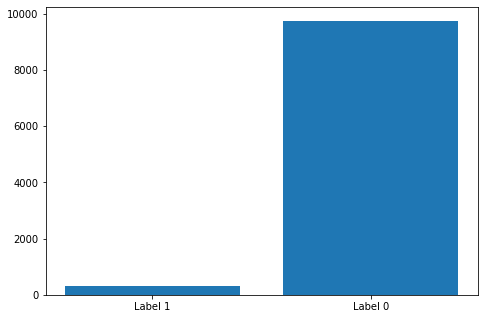

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Labels = ['Label 1', 'Label 0']
Values = [ones, zero]
ax.bar(Labels, Values)
plt.show()

In [53]:
crypto_data = df1.iloc[:, 4:7]

In [54]:
crypto_data['Binance_tr'] = trades[:,0]
crypto_data['Bitfinex_tr'] = trades[:,1]
crypto_data['Coinbase_tr'] = trades[:,2]
crypto_data['Labels'] = labels

In [23]:
crypto_data

,Binance_min_ask,Bitfinex_min_ask,Coinbase_min_ask,Binance_tr,Bitfinex_tr,Coinbase_tr,Labels
0,0.027033,0.026866,0.026865,0.027035,0.026805,0.026864,1
1,0.027033,0.026866,0.026865,0.027046,0.026805,0.026864,1
2,0.027046,0.026866,0.026865,0.027042,0.026805,0.026864,1
3,0.027046,0.027040,0.026865,0.027045,0.026805,0.026864,1
4,0.027046,0.027040,0.026865,0.027049,0.026805,0.026864,1
...,...,...,...,...,...,...,...
10047,0.027315,0.027320,0.027320,0.027324,0.027305,0.027320,0
10048,0.027323,0.027320,0.027340,0.027324,0.027305,0.027320,0
10049,0.027320,0.027320,0.027330,0.027316,0.027305,0.027320,0
10050,0.027316,0.027320,0.027330,0.027319,0.027305,0.027320,1


**Data plotting**

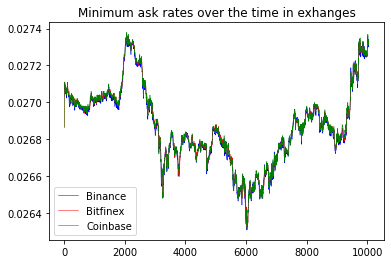

In [67]:
from sklearn.metrics import mean_squared_error
plt.plot(crypto_data[:,0], color = 'blue', label = 'Binance', linewidth=0.5)
plt.plot(crypto_data[:,1], color = 'red', label = 'Bitfinex', linewidth=0.5)
plt.plot(crypto_data[:,2], color = 'green', label = 'Coinbase', linewidth=0.5)

plt.title('Minimum ask rates over the time in exhanges')
plt.legend()
plt.show()

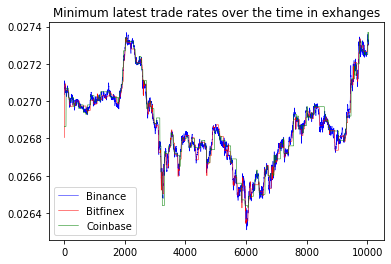

In [68]:
from sklearn.metrics import mean_squared_error
plt.plot(crypto_data[:,3], color = 'blue', label = 'Binance', linewidth=0.5)
plt.plot(crypto_data[:,4], color = 'red', label = 'Bitfinex', linewidth=0.5)
plt.plot(crypto_data[:,5], color = 'green', label = 'Coinbase', linewidth=0.5)

plt.title('Minimum latest trade rates over the time in exhanges')
plt.legend()
plt.show()

In [70]:
crypto_data = np.array(crypto_data)

**Scaling**

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
crypto_data = scaler.fit_transform(crypto_data)

**Train and Test Split**

In [72]:
train_x = []
test_x = []
train_y = []
test_y = []

train_x = crypto_data[:8000,:6]
test_x = crypto_data[8000:,:6]

train_y = crypto_data[:8000,6]
test_y = crypto_data[8000:,6]


train_x, train_y, test_x, test_y = np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)

In [61]:
test_x

array([[0.026965, 0.02695 , 0.02697 , 0.026966, 0.026947, 0.02687 ],
       [0.026965, 0.02695 , 0.02697 , 0.026967, 0.026947, 0.02687 ],
       [0.026967, 0.02695 , 0.02697 , 0.026966, 0.026947, 0.02687 ],
       ...,
       [0.02732 , 0.02732 , 0.02733 , 0.027316, 0.027305, 0.02732 ],
       [0.027316, 0.02732 , 0.02733 , 0.027319, 0.027305, 0.02732 ],
       [0.027318, 0.02732 , 0.02732 , 0.027319, 0.027305, 0.02732 ]])

In [75]:
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

**Modeling**

In [78]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(train_x.shape[1], train_x.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm. compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network

**Batch size setting**

Epoch 1/100
225/225 [==============================] - 1s 3ms/step - loss: 0.6541 - accuracy: 0.5843 - val_loss: 0.6374 - val_accuracy: 0.6388
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 0.6542 - accuracy: 0.5790 - val_loss: 0.6303 - val_accuracy: 0.6112
Epoch 3/100
225/225 [==============================] - 1s 3ms/step - loss: 0.6514 - accuracy: 0.5825 - val_loss: 0.6348 - val_accuracy: 0.6350
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.6560 - accuracy: 0.5853 - val_loss: 0.6225 - val_accuracy: 0.5987
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.6497 - accuracy: 0.5919 - val_loss: 0.6249 - val_accuracy: 0.5975
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.6528 - accuracy: 0.5851 - val_loss: 0.6357 - val_accuracy: 0.6400
Epoch 7/100
225/225 [==============================] - 1s 3ms/step - loss: 0.6530 - accuracy: 0.5792 - val_loss: 0.6267 - val_accuracy: 0.5913

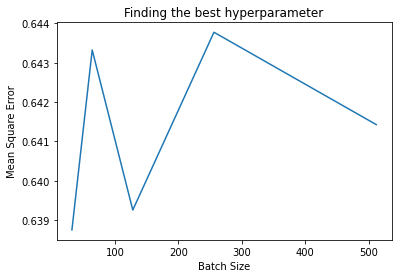

In [84]:
import matplotlib.pyplot as plt
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    testScore = model.evaluate(X_test, y_test, verbose=0)
    return trainScore[0], testScore[0]

def quick_measure(batch):
    model = model_lstm
    model.fit(train_x, train_y, batch_size=batch, epochs=100, validation_split=0.1, verbose=1)
    trainScore, testScore = model_score(model, train_x, train_y, test_x, test_y)
    return trainScore, testScore

batchlist = [32, 64, 128, 256, 512]

batch_result = {}

for batch in batchlist:    
    trainScore, testScore = quick_measure(batch)
    batch_result[batch] = testScore

lists = sorted(batch_result.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.title('Finding the best hyperparameter')
plt.xlabel('Batch Size')
plt.ylabel('Mean Square Error')
plt.show()

**Epoch number setting**

Epoch 1/50
225/225 [==============================] - 1s 4ms/step - loss: 0.6440 - accuracy: 0.5926 - val_loss: 0.6236 - val_accuracy: 0.6375
Epoch 2/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6478 - accuracy: 0.5978 - val_loss: 0.6219 - val_accuracy: 0.6187
Epoch 3/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6438 - accuracy: 0.5936 - val_loss: 0.6239 - val_accuracy: 0.6350
Epoch 4/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6425 - accuracy: 0.5896 - val_loss: 0.6127 - val_accuracy: 0.6150
Epoch 5/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6487 - accuracy: 0.5924 - val_loss: 0.6143 - val_accuracy: 0.6150
Epoch 6/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6464 - accuracy: 0.5892 - val_loss: 0.6212 - val_accuracy: 0.6000
Epoch 7/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6433 - accuracy: 0.5826 - val_loss: 0.6134 - val_accuracy: 0.6175
Epoch 

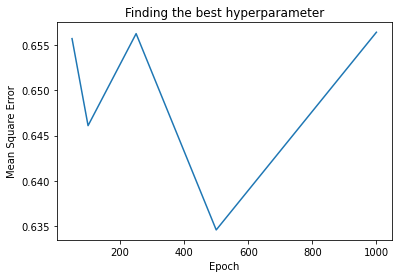

In [85]:
import matplotlib.pyplot as plt
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    testScore = model.evaluate(X_test, y_test, verbose=0)
    return trainScore[0], testScore[0]

def quick_measure(epoch):
    model = model_lstm
    model.fit(train_x, train_y, batch_size=32, epochs=epoch, validation_split=0.1, verbose=1)
    trainScore, testScore = model_score(model, train_x, train_y, test_x, test_y)
    return trainScore, testScore

epochlist = [50, 100, 250, 500, 1000]

epoch_result = {}

for epoch in epochlist:    
    trainScore, testScore = quick_measure(epoch)
    epoch_result[epoch] = testScore

lists = sorted(epoch_result.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.title('Finding the best hyperparameter')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.show()

In [80]:
history = model_lstm.fit(train_x, train_y, batch_size=32, epochs=500, validation_split=0.1, verbose=1)

Epoch 1/500
225/225 [==============================] - 2s 4ms/step - loss: 0.3793 - accuracy: 0.9551 - val_loss: 0.2192 - val_accuracy: 0.9525
Epoch 2/500
225/225 [==============================] - 1s 2ms/step - loss: 0.0989 - accuracy: 0.9800 - val_loss: 0.2126 - val_accuracy: 0.9525
Epoch 3/500
225/225 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9807 - val_loss: 0.2141 - val_accuracy: 0.9525
Epoch 4/500
225/225 [==============================] - 1s 2ms/step - loss: 0.1082 - accuracy: 0.9783 - val_loss: 0.2132 - val_accuracy: 0.9525
Epoch 5/500
225/225 [==============================] - 1s 2ms/step - loss: 0.0945 - accuracy: 0.9806 - val_loss: 0.2101 - val_accuracy: 0.9525
Epoch 6/500
225/225 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9796 - val_loss: 0.2141 - val_accuracy: 0.9525
Epoch 7/500
225/225 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9776 - val_loss: 0.2088 - val_accuracy: 0.9525

**Evaluation**

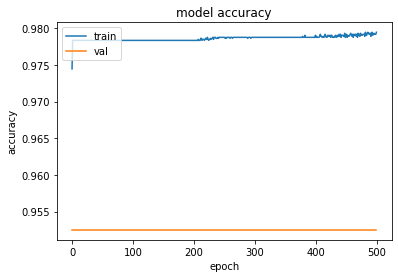

In [83]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [81]:
model_lstm.evaluate(test_x, test_y)

65/65 [==============================] - 1s 2ms/step - loss: 0.2325 - accuracy: 0.9488


[0.2325439602136612, 0.9488304257392883]